<a href="https://colab.research.google.com/github/GilTeteth/100-days-of-code-python/blob/main/Explainable_AI_Car_Sales_Prediction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Explanable Artificial Intelligence
#Assignment
#1.Find dataset
#2. Explore and prepare the dataset
#3. train model
#4.Evaluate  90%
#5.Explain

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBRegressor
import warnings

In [4]:
df = pd.read_csv("/content/cardata.csv")

In [ ]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

The data has 301 rows and 9 columns

Exploratoty Data Analysis

In [6]:
##Looking at the datatypes of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
unique_counts = df.nunique()
unique_counts


Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

This calculate the number of unique values in each columns of the data.

In [8]:
print(df.columns)

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


In [9]:
#Value counts of the column Car Name
Car_Name_count = df['Car_Name'].value_counts(dropna=False)
Car_Name_count

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

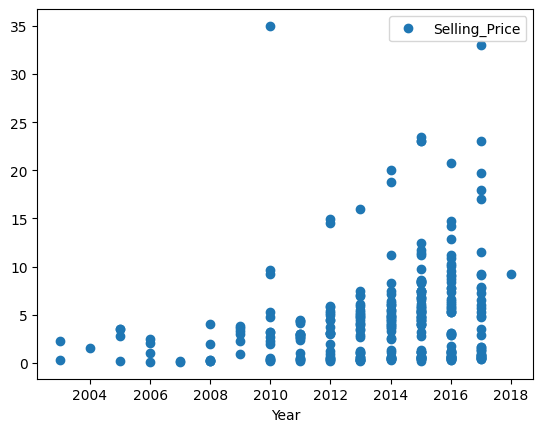

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline

df.plot(x='Year',y='Selling_Price',style='o')
plt.show()

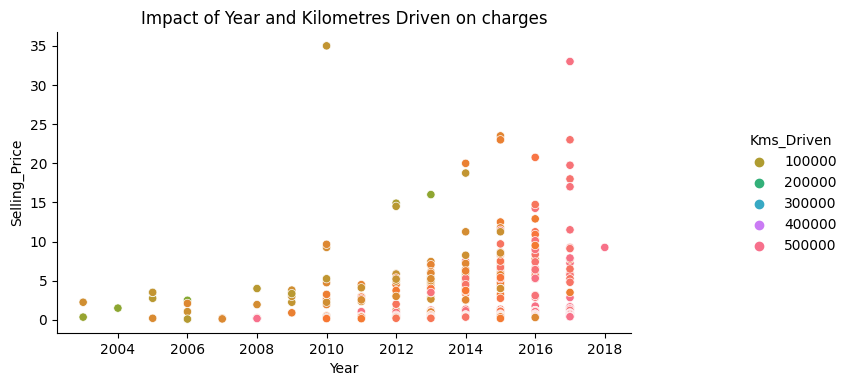

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline
g = sns.pairplot(data = df[['Car_Name','Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']],
             x_vars = ['Year'],y_vars = 'Selling_Price',aspect=1.5 ,hue='Kms_Driven',palette='husl'
            )
g.fig.set_size_inches(9,4)

plt.title('Impact of Year and Kilometres Driven on charges')
plt.show()

(0.0, 36.82443690631269)

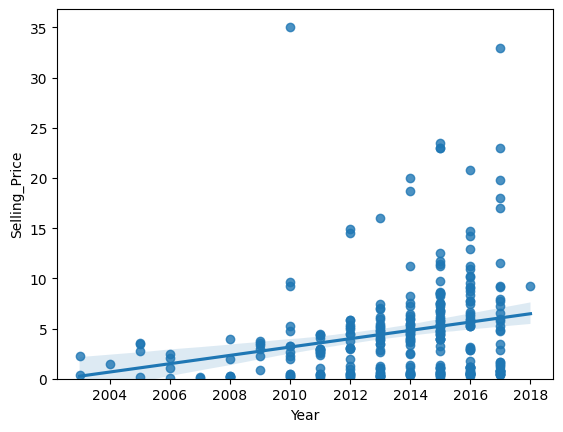

In [12]:
sns.regplot(x = 'Year', y = 'Selling_Price', data = df)
plt.ylim(0,)

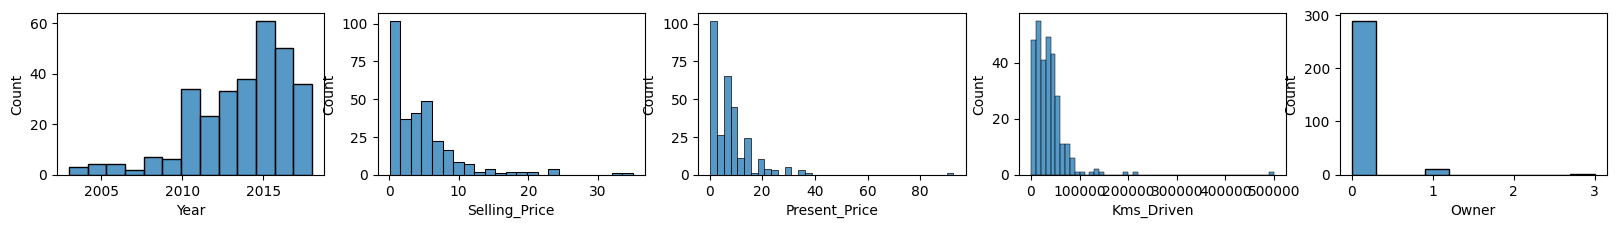

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a pandas DataFrame called 'df' with numerical columns
num = df.select_dtypes(include='number')

plt.figure(figsize=(20, 50))
for i, col in enumerate(num.columns):
    axes = plt.subplot(20, 5, i + 1)
    sns.histplot(x=num[col])


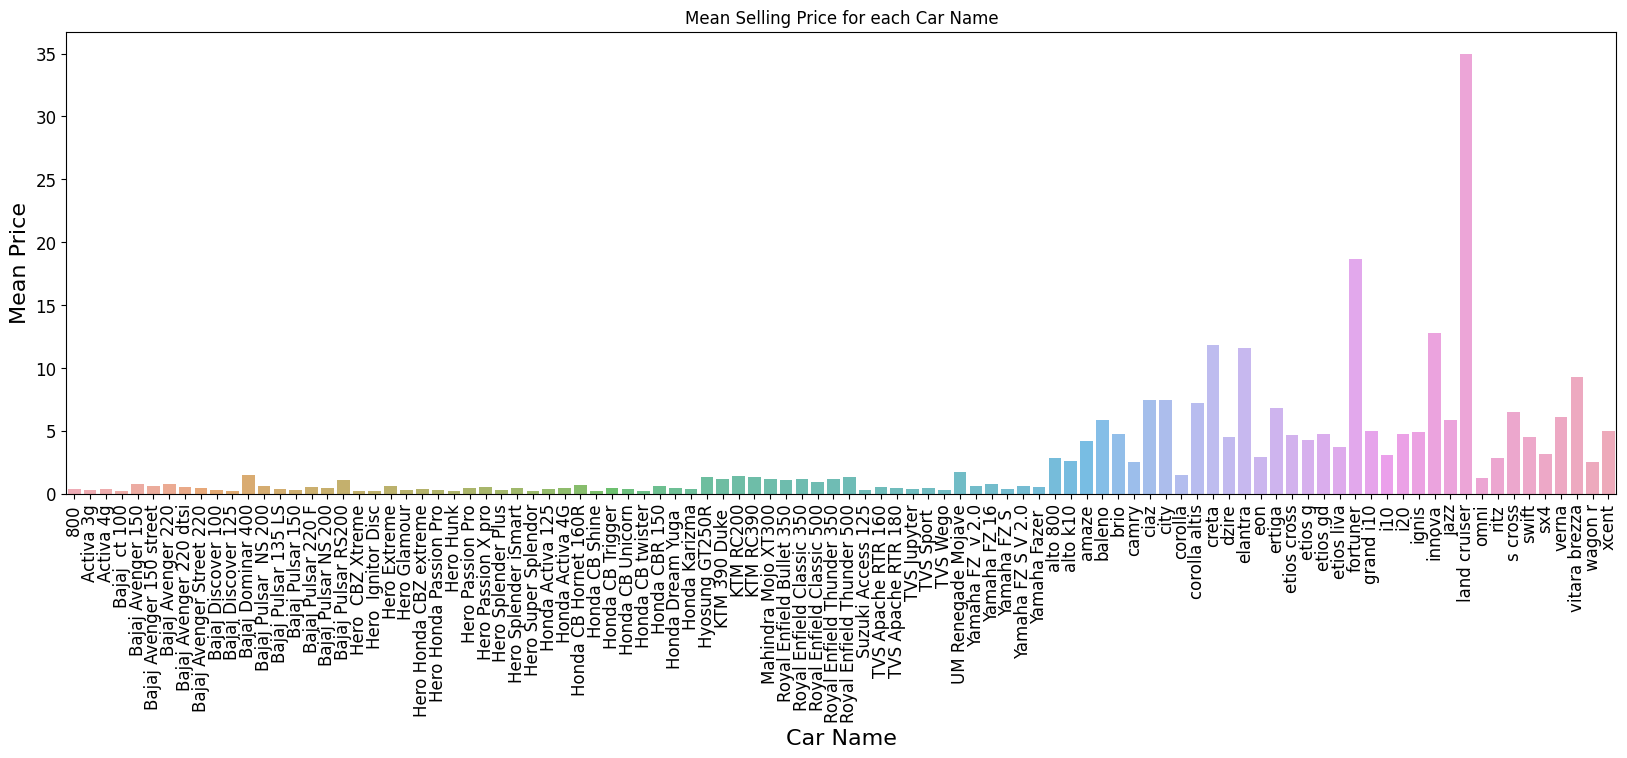

In [14]:
#The mean Selling Price of the car
mean_price_Car_Name = df.groupby('Car_Name')['Selling_Price'].mean().reset_index()

# Plot the bar graph
plt.figure(figsize=(20, 6))
sns.barplot(x='Car_Name', y='Selling_Price', data=mean_price_Car_Name, alpha=0.8)
plt.title('Mean Selling Price for each Car Name')
plt.ylabel('Mean Price', fontsize=16)
plt.xlabel('Car Name', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()


This bar plot shows the mean selling price for each unique car name.

<ipython-input-16-8318ece35fcc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)


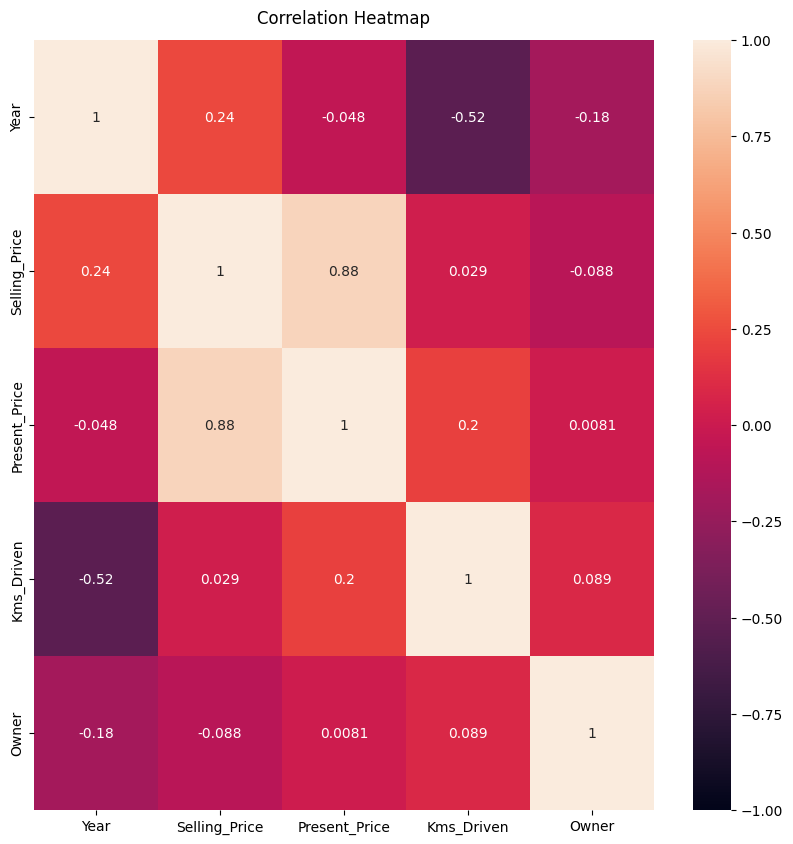

In [16]:

plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 12}, pad=12)
plt.show()


From the above correlation matrix, we can see that there are a few strong correlations between the data.

Random Forest Regressor

In [17]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


X = df[['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
X = pd.get_dummies(X)  # Perform one-hot encoding for categorical features
y = df['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
#Train the model
model.fit(X_train, y_train)
#Evaluate model
y_pred = model.predict(X_test)

#Predict the accuracy
accuracy = r2_score(y_test, y_pred)

accuracy





0.9623919973746844

In [19]:

from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor()

# training data
decision_tree_regressor.fit(X_train, y_train)
Y_pred = decision_tree_regressor.predict(X_test)

# Calculate RMSE
mse = mean_squared_error(y_test, Y_pred)
rmse = round(sqrt(mse), 3)

# Calculating Adjusted R-squared
r2_value = r2_score(y_test, Y_pred)
model_rmse = {}

model_rmse['Decision Tree Regression'] = rmse

# Print the RMSE and R-squared values
print('Root Mean Squared Error of the model is: {}'.format(rmse))
print('R-squared value of the model is: {}'.format(r2_value))


Root Mean Squared Error of the model is: 1.234
R-squared value of the model is: 0.933948876870565


The RandomForestRegressor model had an accuracy of around 0.9578, which is a high value. The DecisionTreeRegressor model, on the other hand, had a Root Mean Squared Error (RMSE) of about 1.442 and an R-squared value of about 0.9098.

The higher accuracy of the RandomForestRegressor model shows that it outperforms the DecisionTreeRegressor model in predicting the target variable. The RandomForestRegressor model has a lower RMSE and a higher R-squared value, indicating that it gives a better overall fit to the data and captures more of the volatility in the target variable.

In [20]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 11.8 MB/s eta 0:00:00


In [21]:
import shap
shap.initjs()

Accuracy: <bound method ForestRegressor.predict of RandomForestRegressor(n_estimators=1000, random_state=0)>


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


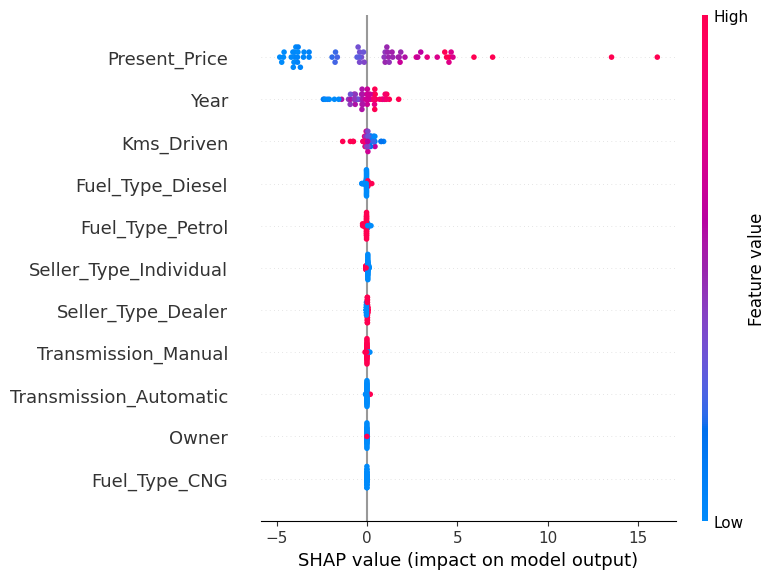

In [22]:
def print_accuracy(accuracy):
    print("Accuracy:", accuracy)
#from sklearn.ensemble import RandomForestRegressor
rforest= RandomForestRegressor(n_estimators=1000, max_depth= None, min_samples_split=2, random_state=0)
rforest.fit(X_train, y_train)
print_accuracy(rforest.predict)

#explain all the predictions in the test set
explainer = shap.TreeExplainer(rforest)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)                            

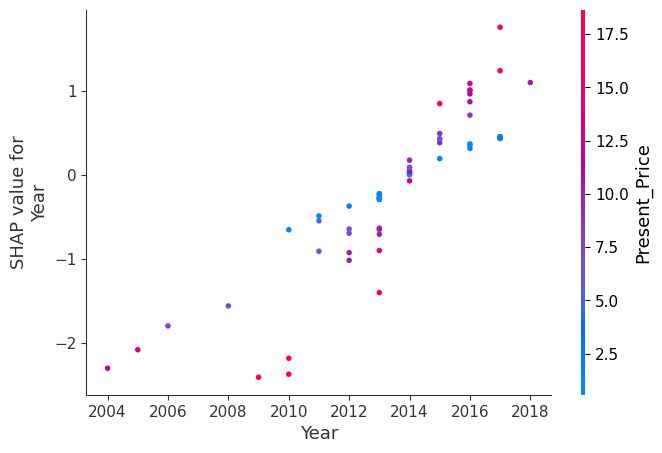

In [23]:
shap.dependence_plot(0, shap_values, X_test)


In [24]:
shap.force_plot(explainer.expected_value, shap_values, X_test)
